
#Google Play, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google.
 Here we got two dataset from Alambetter one is about apps and another one is about user review.Our motive is to analyze the data and visualize it. there is many question could come when we analyze the data,so we will anaswer them.now let's do this: 
We will do this in several steps-

1. Understanding data : Loading the dataset as dataframe. 
2. Data preparation : Cleaning and Extracting essential data.
3. Data visualization : Exploratory analysis and visualizations.
4. Conclusion.

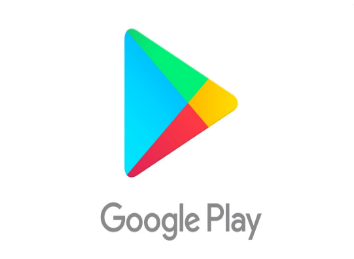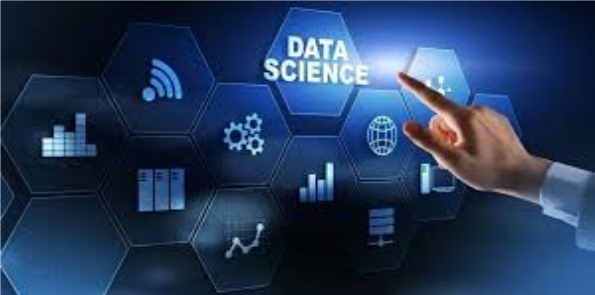


In [ ]:
# importing following libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Mounting drive :
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Data set
apps_df = pd.read_csv('/content/Play Store Data.csv')
reviews_df = pd.read_csv('/content/User Reviews.csv')

In [ ]:
apps_data = apps_df.copy()

#Data Understanding :

Data understanding is very crucial for analysing the data set.So first we have to understand the data structure and hpow data is organized.


In [ ]:
# Have a look for top 5 rows :
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Now last 5 rows :
apps_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Lets find shape of dataset:
apps_data.shape

(10841, 13)

In [ ]:
# Features are :
apps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Basic info
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#Observation of above dataset :
We can observe that, our dataset contains the data of about 10841 apps found on the play store.
Dataset has 13 columns which are the parameters of the apps i.e.,
App, Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating, Genres,Last Updated,Current Ver,Android Ver :

#Data Preparing
Cleaning and transforming raw data prior to processing and analysis.Good data preparation allows for efficient analysis, limit errors that can occur to data during processing.

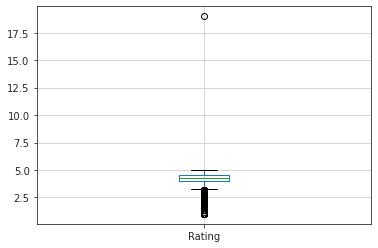

In [ ]:
#Finding Outliers
apps_data.boxplot()

In [ ]:
# Finding duplicates :
apps_data["App"].duplicated().any()

True

In [ ]:
# Deleting duplicates :
apps_data.drop_duplicates("App", inplace=True)

In [ ]:
# shape after droping duplicates
apps_data.shape

(9660, 13)

In [ ]:
# checking the columns which have missing values
columns_with_missing_values = apps_data.columns[apps_data.isnull().any()]
apps_data[columns_with_missing_values].isnull().sum()

Rating            1463
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# looking at missing values in column Type
apps_data[apps_data['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# filling missing data in city column
apps_data['Type'].fillna('Free', inplace= True)

In [ ]:
# looking at missing values in column Content Rating
apps_data[apps_data['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# droping the missing value row
apps_data.dropna(subset=['Content Rating'], inplace= True)

In [ ]:
# droping unnecessary columns
apps_data.drop(columns=['Android Ver','Current Ver'], axis= 1, inplace= True)

Now looking at the missing values of Rating column. There are 1463 values which are missing. This ratings are given by the users, so we cannot predict anything to fill : 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


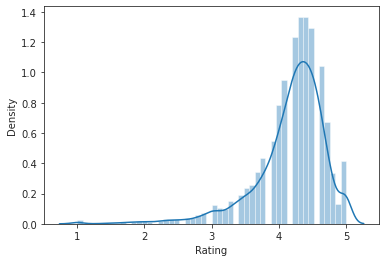

In [ ]:
# plot distribution of rating
sns.distplot(apps_data['Rating']);

The distribution of the rating interprets negatively skewed distribution as more values are concentrated towards the right side of the plot. In skewed distributions, the median is the best measure because it is unaffected by extreme outliers or non-symmetric distributions of scores.

Replace the missing values with the median value of the column.

In [ ]:
# calculating median value
median_value = apps_data['Rating'].median()
median_value

4.3

In [ ]:
# replacing the missing values with median value
apps_data['Rating'].fillna(median_value, inplace= True)

In [ ]:
# checking the count of missing values
apps_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [ ]:
# checking data types
apps_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
dtype: object

Columns like Reviews, Size, Installs, Price are of object type so  we can change their data type to integer/float. 

Let's start with changing **Reviews** column from object to integer.

In [ ]:
# changing data type of column Reviews
apps_data['Reviews'] = apps_data.Reviews.astype(int)

Now changing the type of the **Size** column. First looking at the unique values in the column.

In [ ]:
# checking unique values in Size column
apps_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# removing M and replacing K with e-3
apps_data['Size'] = apps_data['Size'].apply(lambda x: x.replace('M', ''))
apps_data['Size'] = apps_data['Size'].apply(lambda x: x.replace('k', 'e-3'))
apps_data = apps_data[apps_data['Size'] != 'Varies with device']

# changing the type of Size column
apps_data['Size'] = apps_data['Size'].astype(float)

<ipython-input-103-3b1da91ff8f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_data['Size'] = apps_data['Size'].astype(float)


To change the type of **Installs** column first we have to remove the special character **'+'** and **','** from the values.

In [ ]:
# removing special characters
apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace('+', ''))
apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace(',', ''))

# changing the type of Installs column
apps_data['Installs'] = apps_data['Installs'].astype(int)

<ipython-input-104-9a4aeed3b527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace('+', ''))
<ipython-input-104-9a4aeed3b527>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace(',', ''))
<ipython-input-104-9a4aeed3b527>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Now changing the type of **Price** column to float. First, we have remove the special character **'$'**.

In [ ]:
# removing $ and changing the type of Price column
apps_data['Price'] = apps_data['Price'].apply(lambda x: x.replace('$', ''))
apps_data['Price'] = apps_data['Price'].astype(float)

<ipython-input-105-9d891c4db9a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_data['Price'] = apps_data['Price'].apply(lambda x: x.replace('$', ''))
<ipython-input-105-9d891c4db9a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_data['Price'] = apps_data['Price'].astype(float)


Now looking at the **last updated** column it contains the date on which the app is updated/launched last time. It is of object type so we have to convert date in the date-time format.

In [ ]:
# converting 'date' dtype from object to datetime
def get_date(date_string):
  date_obj = datetime.strptime(date_string, '%B %d, %Y').date()
  date_obj = pd.to_datetime(date_obj, format="%Y-%m-%d")
  return date_obj

apps_data['Last Updated'] = apps_data['Last Updated'].apply(get_date)

## **Final look at the dataset**


In [ ]:
# reseting the index
apps_data.reset_index(drop= True, inplace= True)

In [ ]:
# top 5 rows
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


In [ ]:
# last 5 rows
apps_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
8427,FR Forms,BUSINESS,4.3,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29
8428,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25
8429,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06
8430,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20
8431,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25


In [ ]:
# basic info
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8432 entries, 0 to 8431
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8432 non-null   object        
 1   Category        8432 non-null   object        
 2   Rating          8432 non-null   float64       
 3   Reviews         8432 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        8432 non-null   int64         
 6   Type            8432 non-null   object        
 7   Price           8432 non-null   float64       
 8   Content Rating  8432 non-null   object        
 9   Genres          8432 non-null   object        
 10  Last Updated    8432 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 724.8+ KB


In [ ]:
# descriptive Statistics
apps_data.describe()

,Rating,Reviews,Size,Installs,Price
count,8432.000000,8.432000e+03,8432.000000,8.432000e+03,8432.000000
mean,4.183847,1.206553e+05,20.395289,3.724212e+06,1.225972
std,0.513070,9.363450e+05,21.827542,2.482940e+07,18.028685
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,1.700000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,4.755000e+02,12.000000,5.000000e+04,0.000000
75%,4.500000,1.566725e+04,28.000000,1.000000e+06,0.000000
max,5.000000,4.489172e+07,100.000000,1.000000e+09,400.000000


Observation:
After cleaning we have dataset of shape 8432 apps and 11 columns.
There are no missing values now and columns have their respective data types.
Rating for apps given by users is out of 5 having average rating of 4.18.
We can now explore the dataset and perform analysis.

#Insights form Data
To get an insight, and learn the trend, pattern and get answers to some of the questions related to the dataset.

#What percentage of apps are paid?

In [ ]:
# data to plot
data = apps_data['Type'].value_counts()

# displaying free and paid apps
print(f"Number of free apps:{data['Free']}")
print(f"Number of paid apps:{data['Paid']}")

Number of free apps:7747
Number of paid apps:685


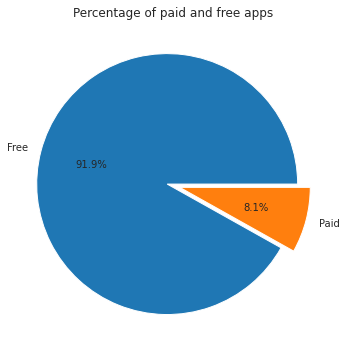

In [ ]:
# Pie Chart
plt.figure(figsize=[10,6])

labels = data.keys()
plt.pie(x=data, labels=labels, autopct="%.1f%%", explode=[0.05]*2)
plt.title("Percentage of paid and free apps");

Observation:
From the above chart, we can see that 91.9% of apps in the play store dataset are free apps and 8.1% apps are paid.

There are very less paid apps as compare to free apps.

# Do higher rated apps attract more users?

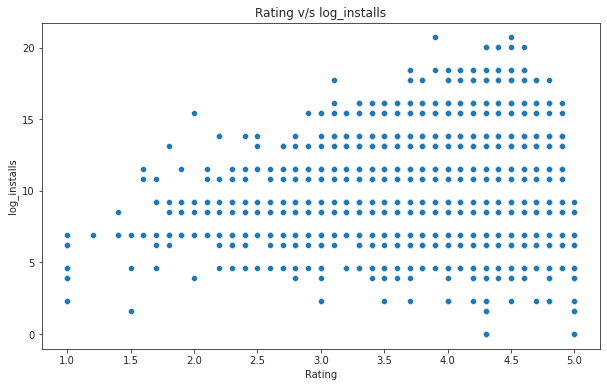

In [ ]:
# scatter plot Rating v/s log_installs
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="Rating", y="log_installs", data=apps_data)

# set title
plt.title("Rating v/s log_installs");

Observation:
Above graph shows positive relationship between Rating and Installation.

The higher rating does contribute to more installations.

People have a natural tendency to trust the opinion of those around them. This is the reason why users prefer highly rated apps to download.

Why are there apps with high ratings but low installation? It seems those apps are good but few people have used them.

# Are app updates important?

In [ ]:
# getting year of update
apps_data['Update_Year'] = pd.DatetimeIndex(apps_data['Last Updated']).year
apps_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,log_installs,log_reviews,Update_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,9.210340,5.068904,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,13.122363,6.874198,2018


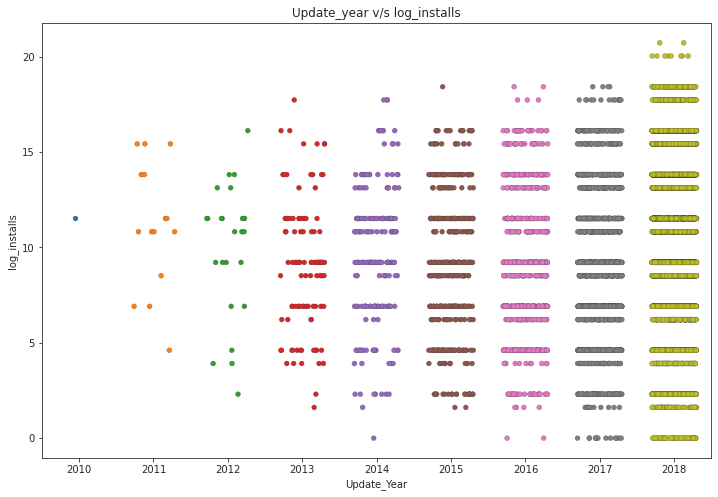

In [ ]:
# stripplot Update_year v/s log_installs
plt.figure(figsize=(12,8))

sns.stripplot(data =apps_data, x="Update_Year", y="log_installs", 
              jitter=0.3, size=5, linewidth=.2)

plt.title("Update_year v/s log_installs");

Observation:
We can see from above plot that most of the apps get frequent updates and they are also installed more.

There are very less apps which got updates in 2010, 2011 and 2012 year.

We can say that those developers who make their app better over period of time have great chance of success.

For further analysis we will need some more data which we will get from the secondary dataset which contains the information about the reviews given by the users for the apps. But before using it we should have a glance at the dataset and do neccesary steps for making the dataset more usefull.

Now look at the reviews dataset

In [ ]:
# copying the dataset for cleaning and analysis
reviews_data = reviews_df.copy()

In [ ]:
# top 5 rows
reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# basic info
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


User reviews dataset contain 5 columns namely App, Translated Review, Sentiment, Sentiment Polarity and Sentiment Subjectivity. Different users express their thoughts and feelings about the app and they are stored in the Translated_Review column and by analysing the emotion of the text the other three columns are generated.

Sentiment analysis is the process of detecting positive or negative sentiment in text. Sentiment column has three unique values namely Positive, Negative and Neutral. It describes the sentiment of the user giving the review.

Sentiment Polarity indicates how negative or positive the overall review analyzed is. Anything below a score of 0 we tag as negative, anything above 0 we tag as positive and 0 as neutral.

Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

# Cleaning 2nd data set

In [ ]:
# looking for the missing values
reviews_data.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# droping unnecessary columns and missing values
reviews_data.drop(columns= ["Translated_Review","Sentiment"], axis= 1, inplace= True)
reviews_data.dropna(inplace= True)

In [ ]:
# merging reviews dataset with apps dataset
temp3_df = pd.merge(apps_data, reviews_data, on="App", how ="inner")

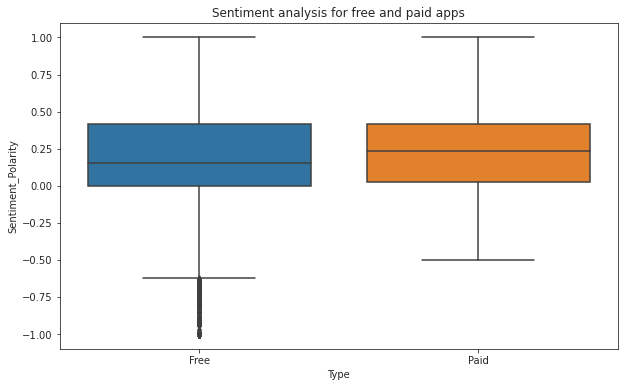

In [ ]:
# setting plot size
plt.figure(figsize=(10,6))

# Boxplot for sentiment analysis
sns.boxplot(x ="Type", y ="Sentiment_Polarity", data= temp3_df)
plt.title("Sentiment analysis for free and paid apps");

Observation:
Free app gets more negative reviews as indicated by the outliers on the negative side.

Median polarity is higher for paid apps as compared to free apps because users are generally more loyal to Apps they pay for.

We can say that paid apps have better quality than free apps.

# Are sentiment influences the final rating of the app

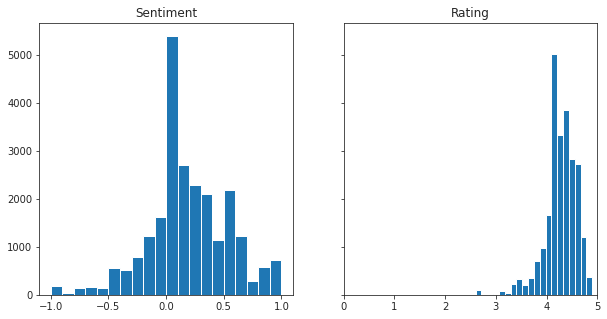

In [ ]:
# create the plot for the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)

# create the histograms
ax[0].hist(temp3_df["Sentiment_Polarity"], bins=20)
ax[1].hist(temp3_df["Rating"], bins=20)
ax[1].set_xlim(0, 5)

# add titles
ax[0].set_title("Sentiment")
ax[1].set_title("Rating")

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


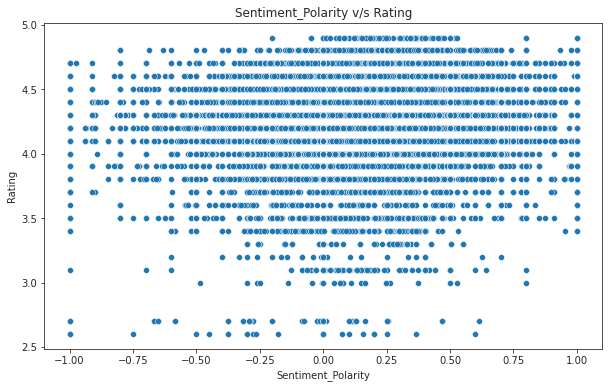

In [ ]:
# scatter plot 
plt.figure(figsize=(10,6))
sns.scatterplot(temp3_df['Sentiment_Polarity'], temp3_df['Rating'])
plt.title("Sentiment_Polarity v/s Rating");

Observation:
Looking at the histograms, we can see a positive trend for both columns. In the Sentiment aspect, the majority of the values are above neutral (0), at around 0.2

For the Rating column, most of the apps have got ratings above 3.5

We can say that positive reviews about the app can strengthen new user's decision to download.